In [1]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


### Instructions:
## Download the wine dataset from the UCI Machine Learning Repository
## Load the dataset into a Pandas dataframe.
## Split the dataset into features and target variables.
## Perform data preprocessing (e.g., scaling, normalisation, missing value imputation) as necessary.
## Implement PCA on the preprocessed dataset using the scikit-learn library.
## Determine the optimal number of principal components to retain based on the explained variance ratio.
## Visualise the results of PCA using a scatter plot.
## Perform clustering on the PCA-transformed data using K-Means clustering algorithm.
## Interpret the results of PCA and clustering analysis.

In [11]:
import pandas as pd
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"
df = pd.read_csv(url, header=None)

In [12]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [14]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [15]:
X.shape

(178, 13)

In [17]:
y.shape

(178,)

In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [19]:
X_scaled

array([[-1.21394365,  1.51861254, -0.5622498 , ...,  0.25171685,
         0.36217728,  1.84791957],
       [-1.21394365,  0.24628963, -0.49941338, ..., -0.29332133,
         0.40605066,  1.1134493 ],
       [-1.21394365,  0.19687903,  0.02123125, ...,  0.26901965,
         0.31830389,  0.78858745],
       ...,
       [ 1.37386437,  0.33275817,  1.74474449, ...,  2.22423597,
        -1.61212515, -1.48544548],
       [ 1.37386437,  0.20923168,  0.22769377, ...,  1.83492299,
        -1.56825176, -1.40069891],
       [ 1.37386437,  1.39508604,  1.58316512, ...,  1.79166599,
        -1.52437837, -1.42894777]])

In [20]:
from sklearn.decomposition import PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

In [22]:
X_scaled.shape

(178, 13)

In [23]:
explained_variance_ratio = pca.explained_variance_ratio_

In [24]:
explained_variance_ratio

array([0.3996507 , 0.16770494, 0.10920338, 0.0683296 , 0.06528109,
       0.05148865, 0.04248671, 0.02680753, 0.02028839, 0.01995798,
       0.01304329, 0.01042324, 0.00533449])

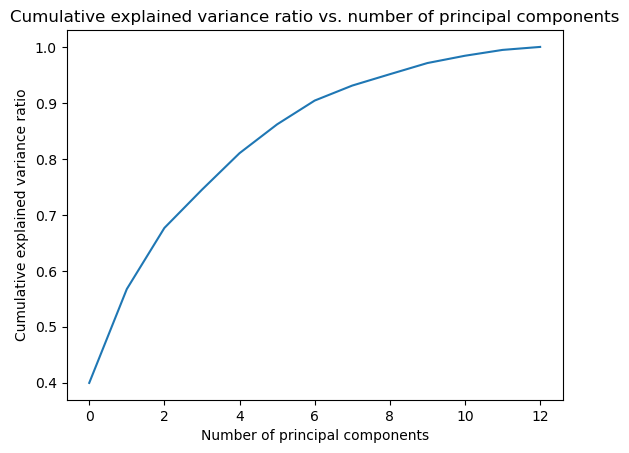

In [25]:
import numpy as np
import matplotlib.pyplot as plt
cum_explained_variance_ratio = np.cumsum(explained_variance_ratio)
plt.plot(cum_explained_variance_ratio)
plt.xlabel("Number of principal components")
plt.ylabel("Cumulative explained variance ratio")
plt.title("Cumulative explained variance ratio vs. number of principal components")
plt.show()


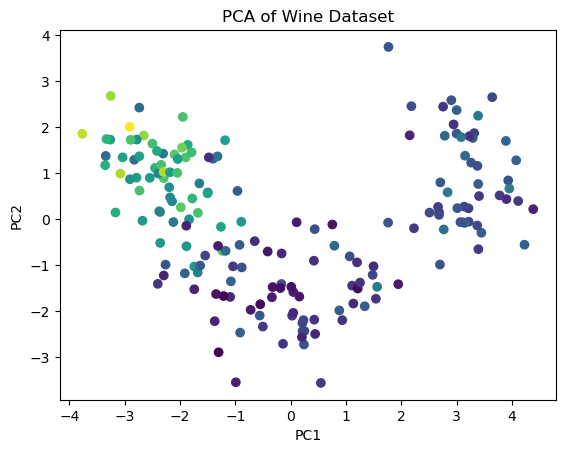

In [26]:
import matplotlib.pyplot as plt
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA of Wine Dataset")
plt.show()


In [27]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_pca)
y_pred = kmeans.predict(X_pca)


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


## The results of PCA and clustering analysis on the wine dataset provide valuable insights into the different groups of wines.

## PCA allowed us to reduce the dimensionality of the data without losing much information. This was useful for visualization and clustering.

##  The PCA scatter plot showed that the three types of wine are well-separated in the PCA space. This suggests that the PCA-transformed data is informative and can be used to distinguish between the different types of wine.

##  The K-Means clustering algorithm successfully identified three distinct groups of wines in the PCA-transformed data.

## We can further interpret the clustering results by examining the mean values of the features for each cluster. This can help us to identify the characteristics that distinguish the different groups of wines.